# Heart Disease Prediction using Classification Algorithm
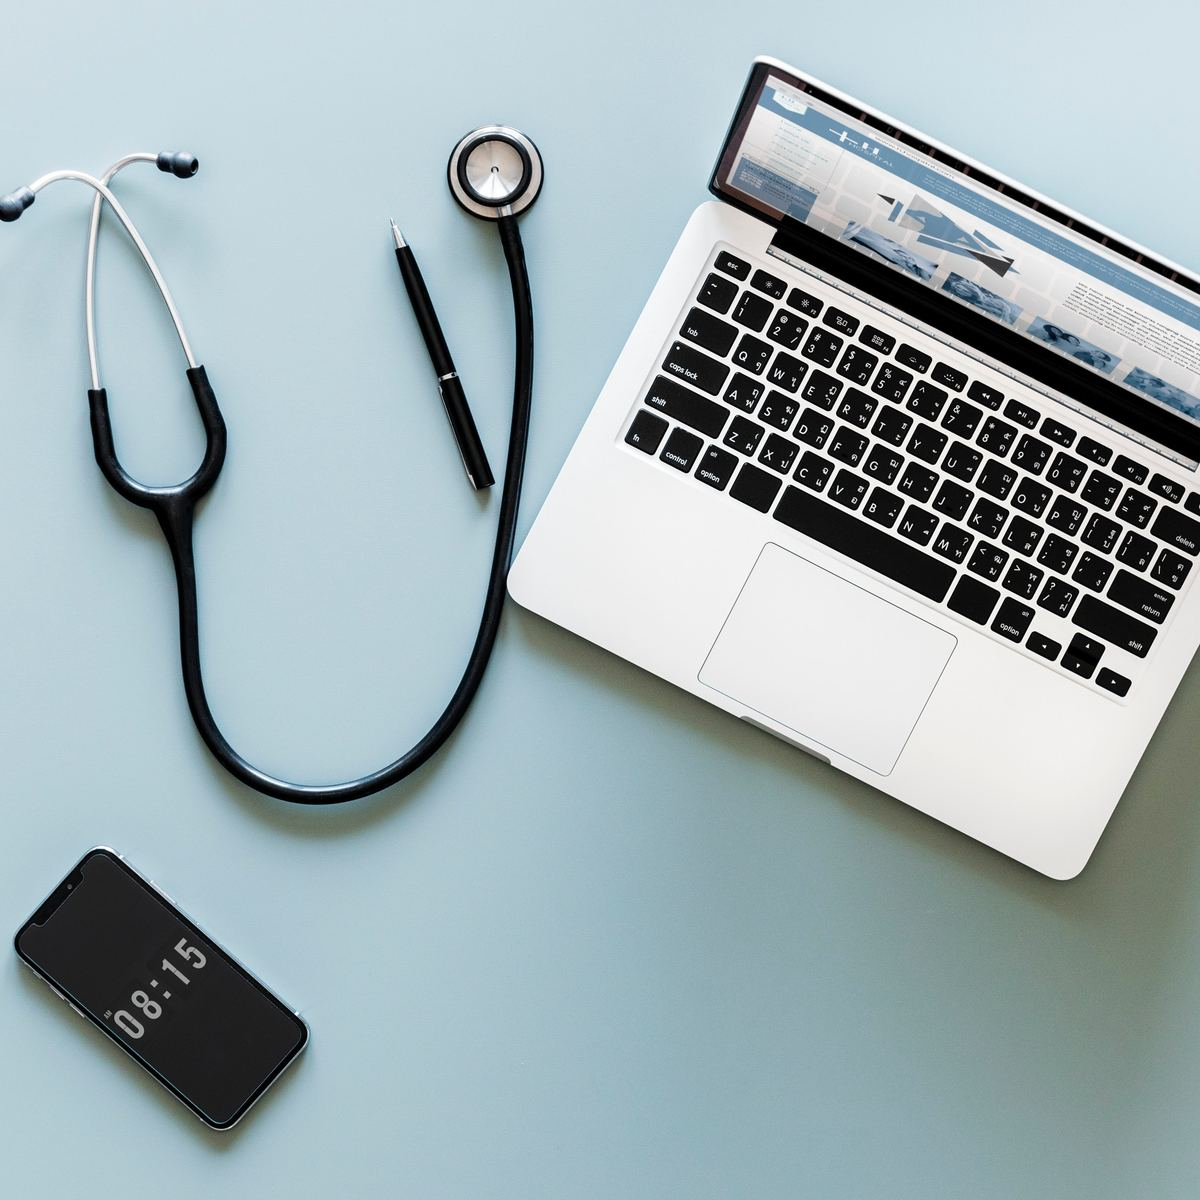

* A brief work is done on EDA and Modelling.
* I have achieved accuracy of 89% using Hyperparameter Optimization.
* If you find my work interesting, do upvote it.



## Problem statement

We are given with various clinical parameters of a patient and we have to predict whether or not she is suffereing from heart disease.

## Features

* Age (age in years)
* Sex (1 = male; 0 = female)
* CP (chest pain type)
* TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
* CHOL (serum cholestoral in mg/dl)
* FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* RESTECH (resting electrocardiographic results)
* THALACH (maximum heart rate achieved)
* EXANG (exercise induced angina (1 = yes; 0 = no))
* OLDPEAK (ST depression induced by exercise relative to rest)
* SLOPE (the slope of the peak exercise ST segment)
* CA (number of major vessels (0-3) colored by flourosopy)
* THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
* TARGET (1 or 0)

## Introduction

The three major portion of this notebook are:-

1. Exploratory Data Analysis
2. Feature Engineering
3. Modeling with Hyperparameter Optimization

**This is default first cell in any kaggle kernel. They import NumPy and Pandas libraries and it also lists the available Kernel files. NumPy is the fundamental package for scientific computing with Python. Pandas is the most popular python library that is used for data analysis.**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


## Importing Necessary Libraries

In [2]:
# Plotting Libraries

import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
%matplotlib inline

# Metrics for Classification technique

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# Scaler

from sklearn.preprocessing import RobustScaler, StandardScaler

# Cross Validation

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split

# Linear Models

from sklearn.linear_model import LogisticRegression

# Ensemble Technique

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Other model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Model Stacking 

from mlxtend.classifier import StackingCVClassifier

# Other libraries

from datetime import datetime
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.impute import SimpleImputer
from numpy import nan
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

## Data Loading

Our first step is to extract train and test data. We will be extracting data using pandas function read_csv. Specify the location to the dataset and import them.

In [3]:
# Importing Data

df = pd.read_csv("../input/heart-disease-uci/heart.csv")
data = df.copy()
df.head(6) # Mention no of rows to be displayed from the top in the argument

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


# Exploratory Data Analysis 

In [4]:
#Size of the dataset

n = df.shape[0]
m = df.shape[1]

print("No of rows - ",n,"| No of columns - ",m)

No of rows -  303 | No of columns -  14


**We have a dataset with 303 rows which indicates a smaller set of data.**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* Out of 14 features, we have 13 int type and only one with float data type.
* Woah! We have no missing values in our dataset.

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Let's check correleation between various features.**

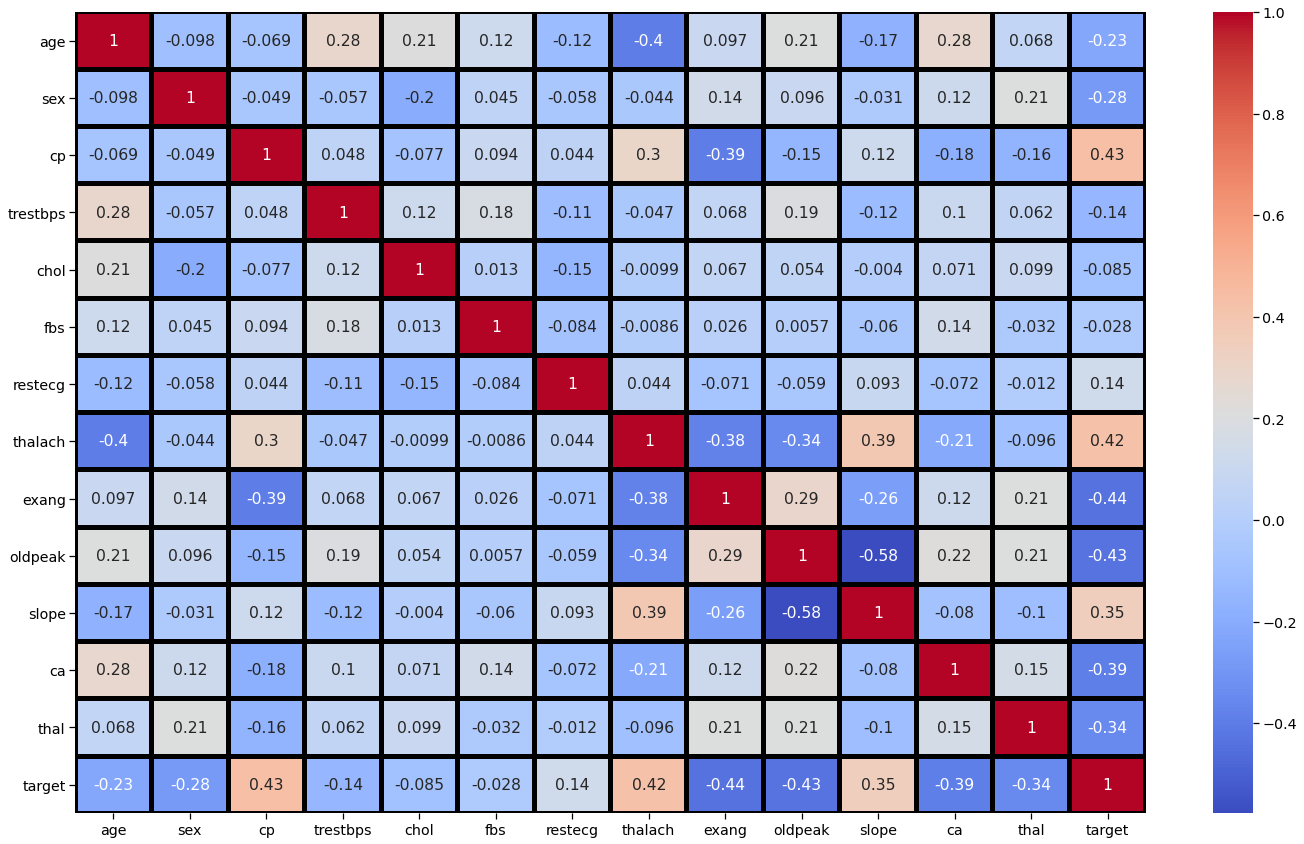

In [7]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',linewidth = 4,linecolor='black')
plt.tight_layout()

**Let's check the correlation of various features with the target feature.**

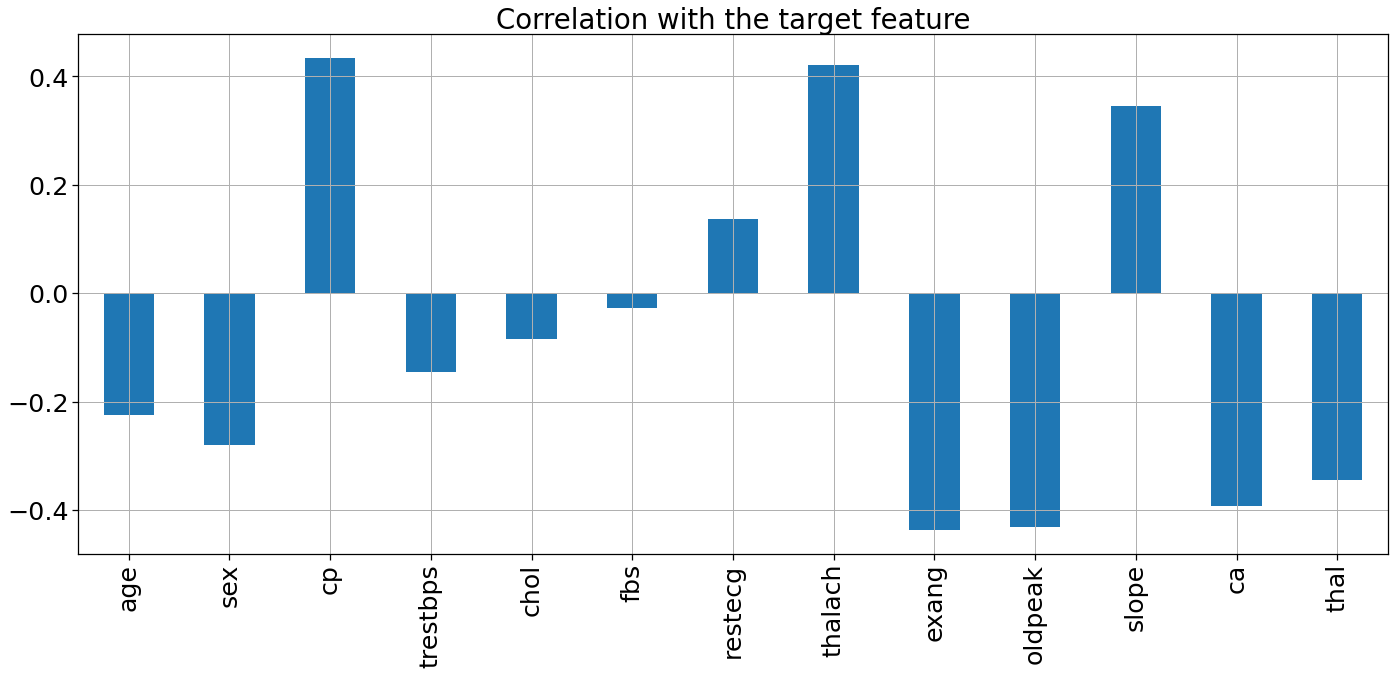

In [8]:
# plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                   title="Correlation with the target feature")
plt.tight_layout()

* Four feature( "cp", "restecg", "thalach", "slope" ) are positively correlated with the target feature.
* Other features are negatively correlated with the target feature.

**Individual Feature Analysis**

## Age("age") Analysis

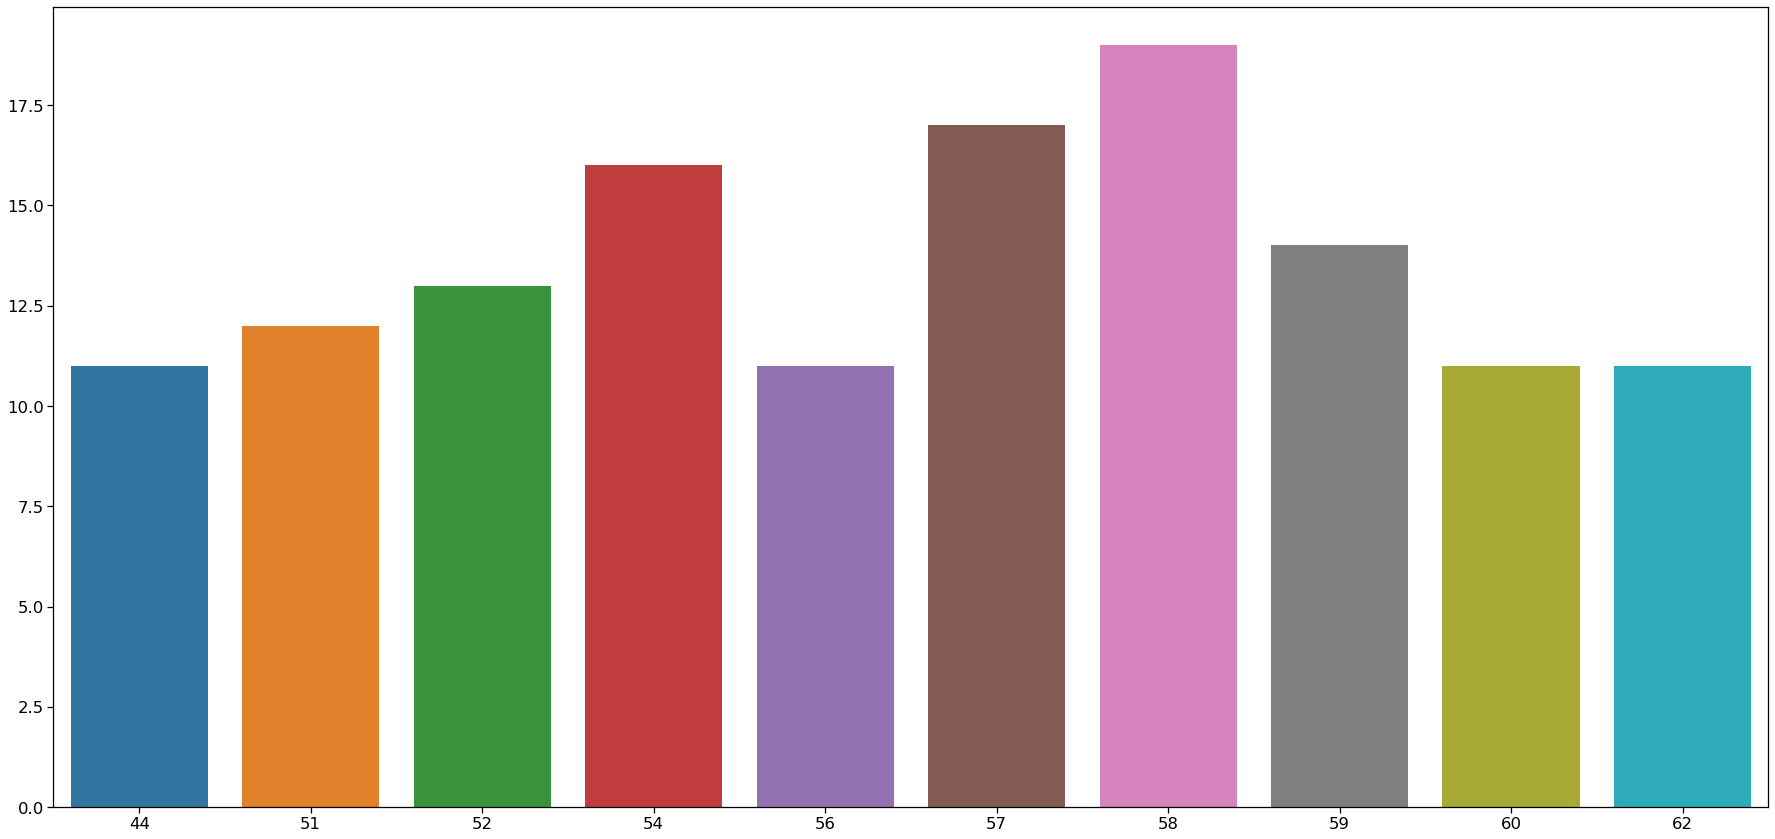

In [9]:
# Let's check 10 ages and their count

plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

**Let's check the range of age in the dataset.**

In [10]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


**We should divide the Age feature into three parts - "Young", "Middle" and "Elder"**

In [11]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

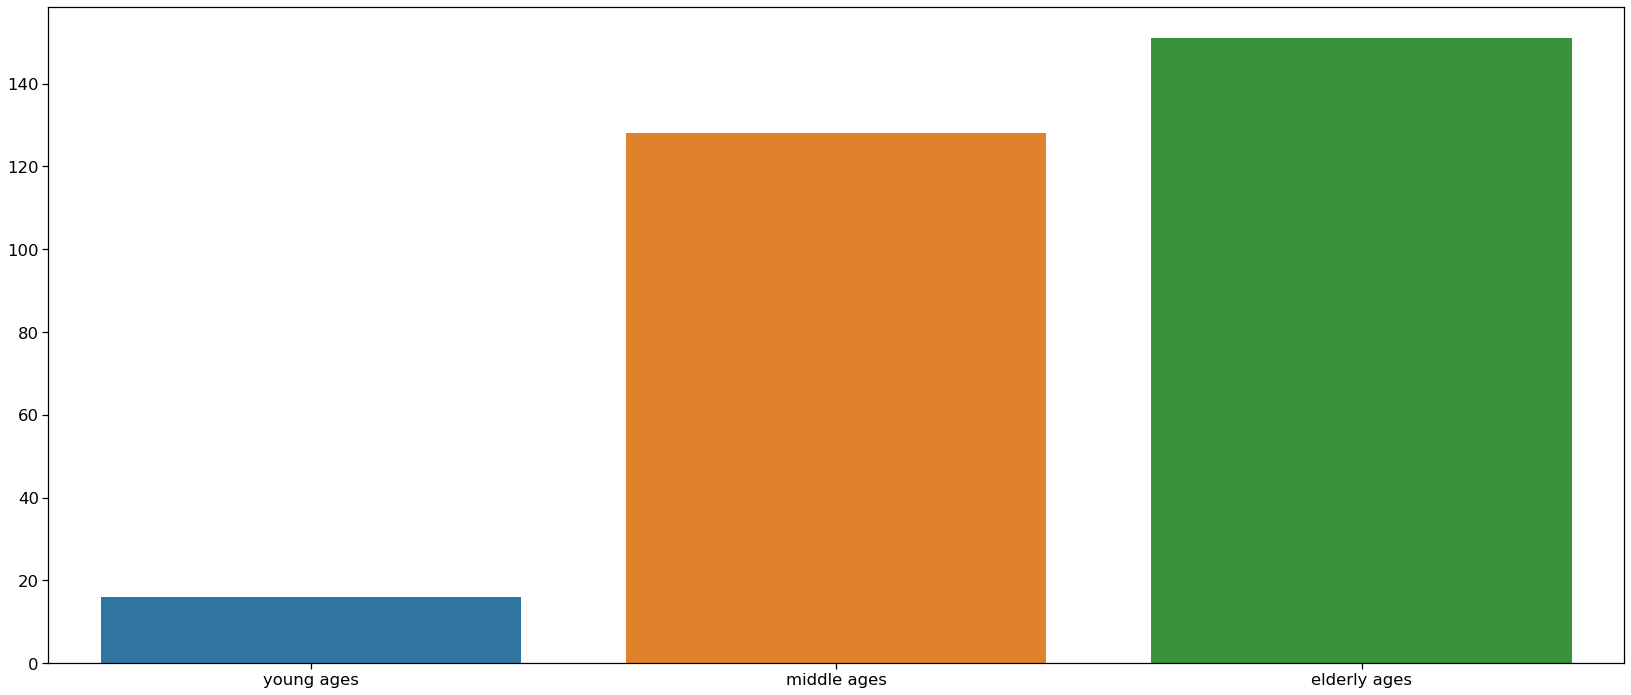

In [12]:
plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**A large proportion of dataset contains Elder people.**

In [13]:
data['AgeRange']=0
youngAge_index=data[(data.age>=29)&(data.age<40)].index
middleAge_index=data[(data.age>=40)&(data.age<55)].index
elderlyAge_index=data[(data.age>55)].index

In [14]:
for index in elderlyAge_index:
    data.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data.loc[index,'AgeRange']=1

for index in youngAge_index:
    data.loc[index,'AgeRange']=0

**Let's plot the relation between Age Group and Sex feature.**

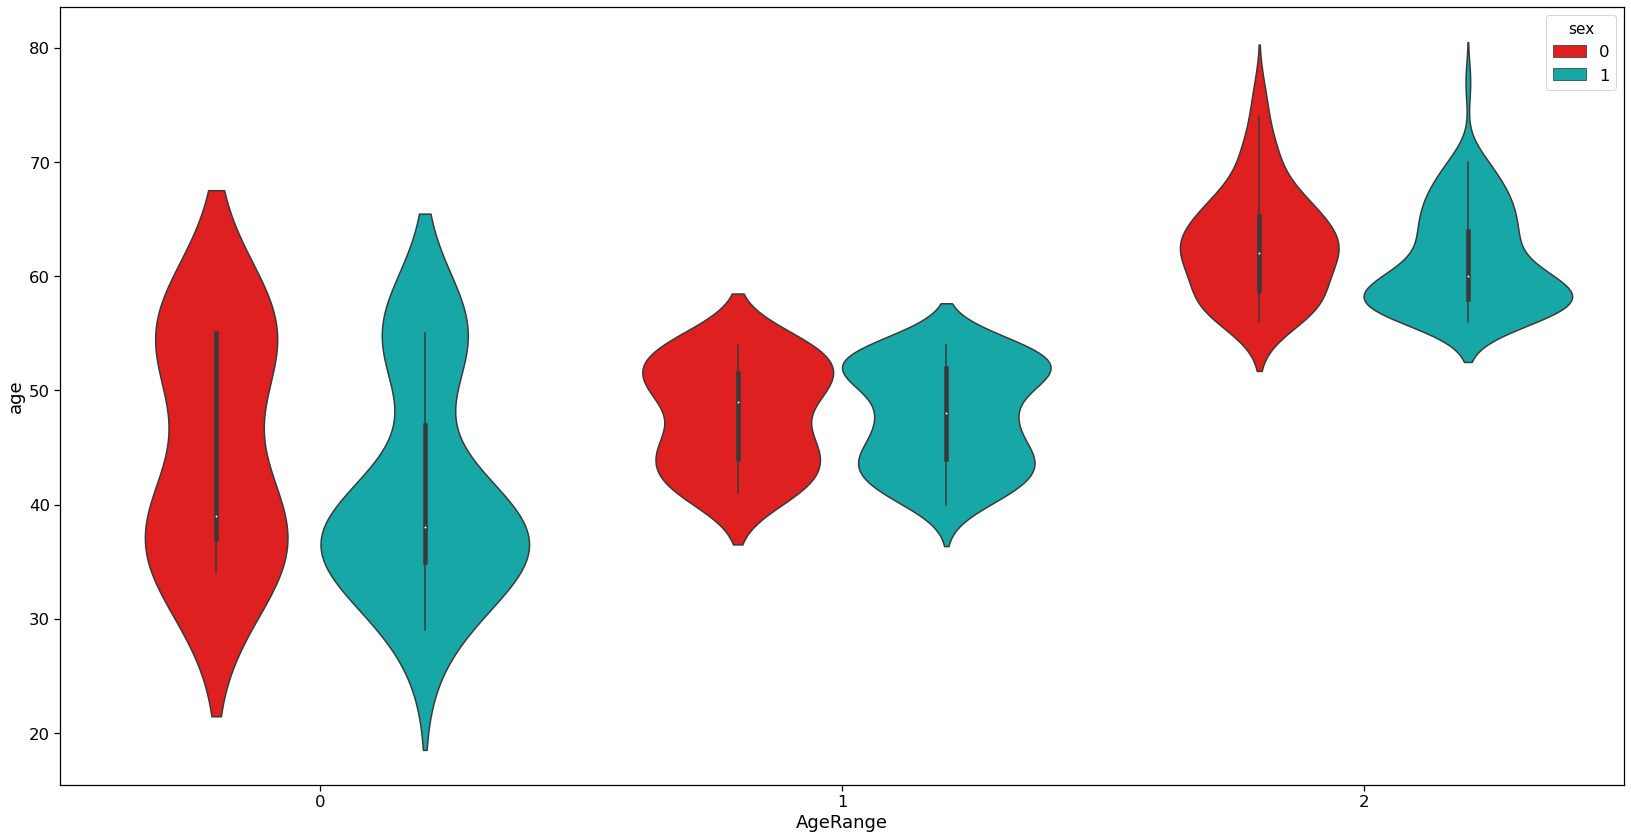

In [15]:
plt.figure(figsize=(23,12))
sns.set_context('notebook',font_scale = 1.5)
sns.violinplot(x="AgeRange",y="age",data=data,palette=["r", "c", "y"],hue="sex")
plt.tight_layout()

**Let's plot the relation between Age Group and Target feature.**

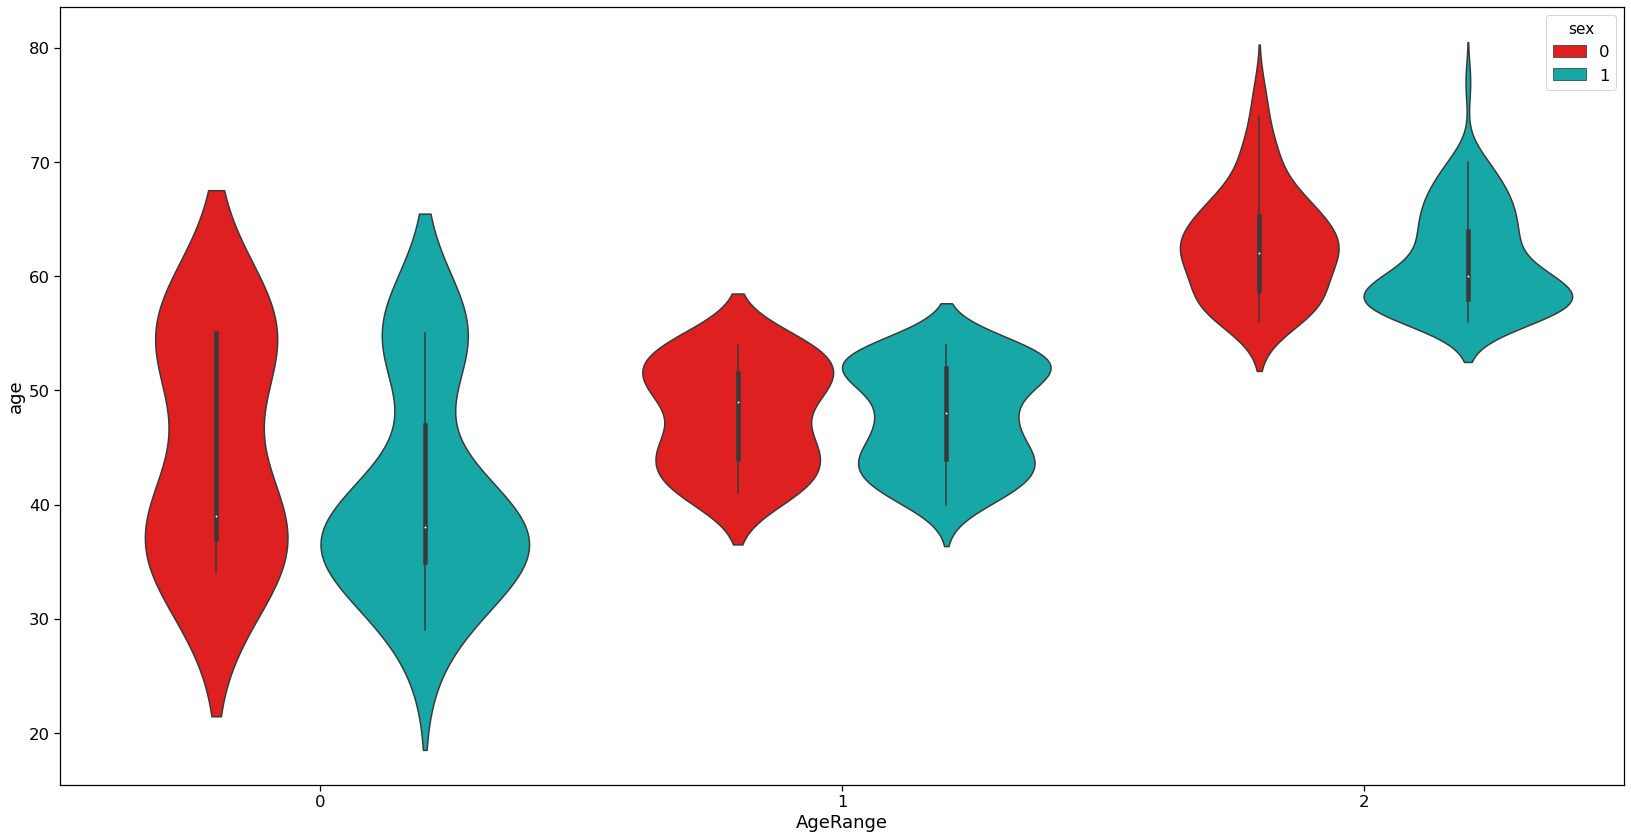

In [16]:
plt.figure(figsize=(23,12))
sns.set_context('notebook',font_scale = 1.5)
sns.violinplot(x="AgeRange",y="age",data=data,palette=["r", "c", "y"],hue="sex")
plt.tight_layout()

**Elderly people are more likely to suffer from heart disease.**

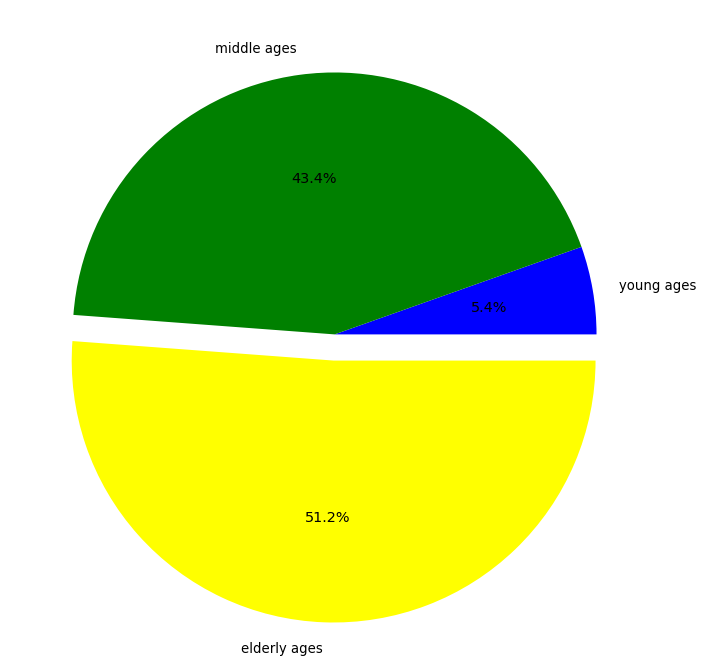

In [17]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

## Sex("sex") Feature Analysis

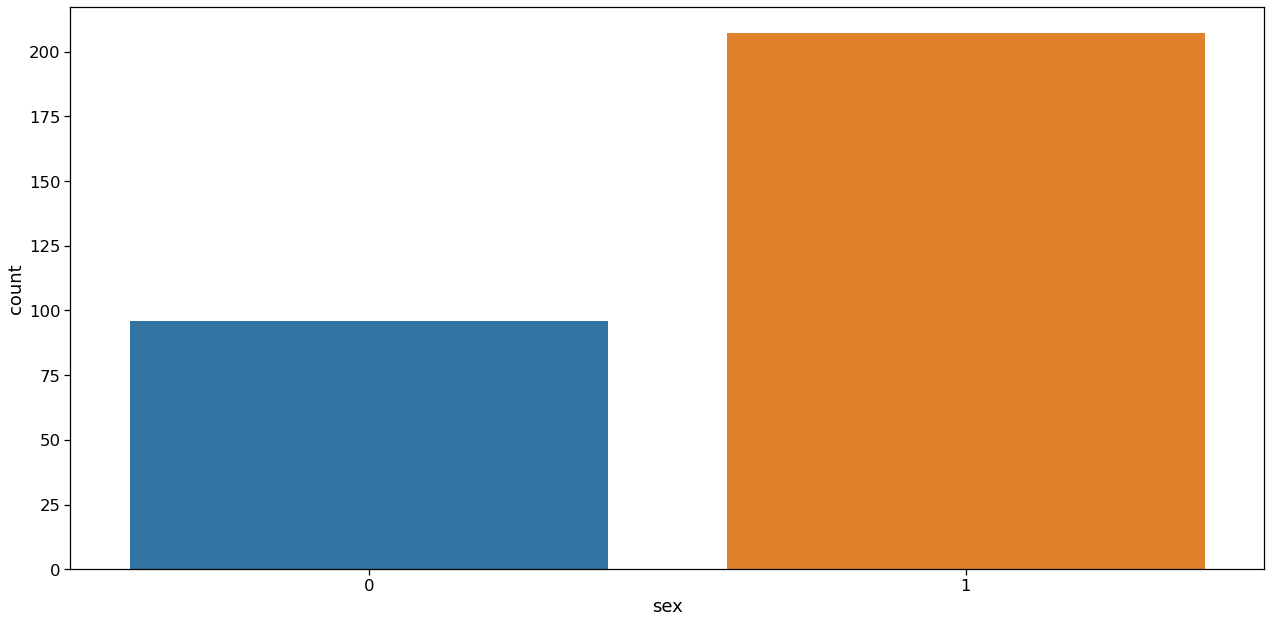

In [18]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'])
plt.tight_layout()

**Ratio of Male to Female is approx 2:1**

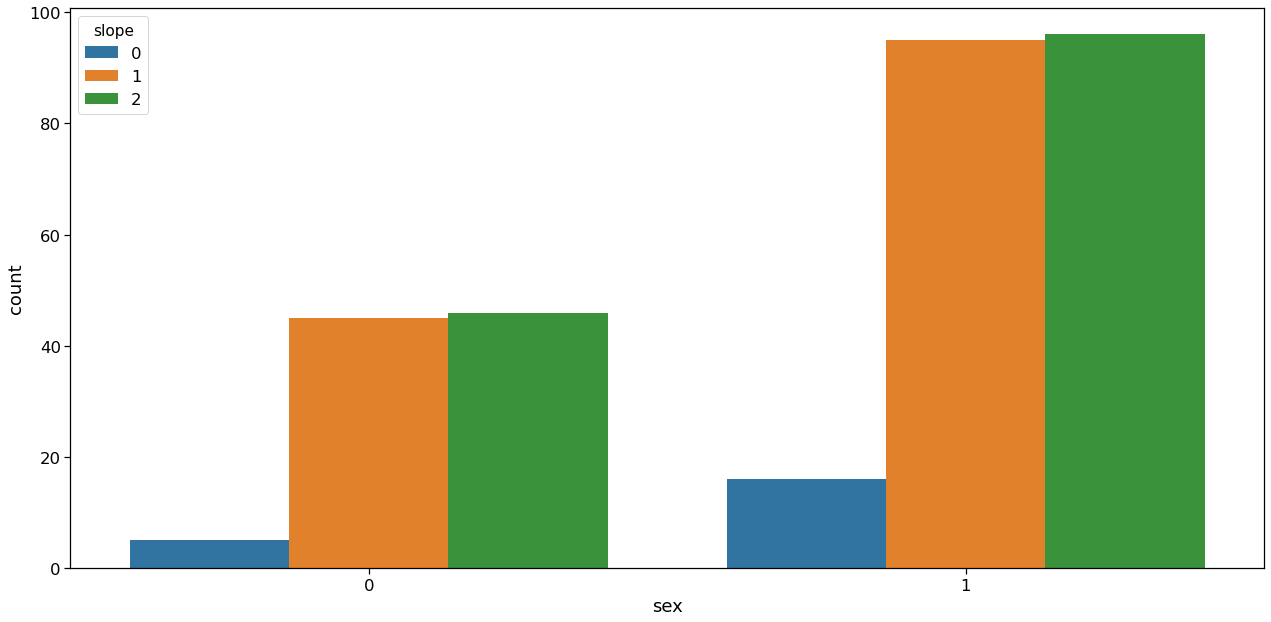

In [19]:
# Let's plot the relation between sex and slope.

plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(df['sex'],hue=df["slope"])
plt.tight_layout()

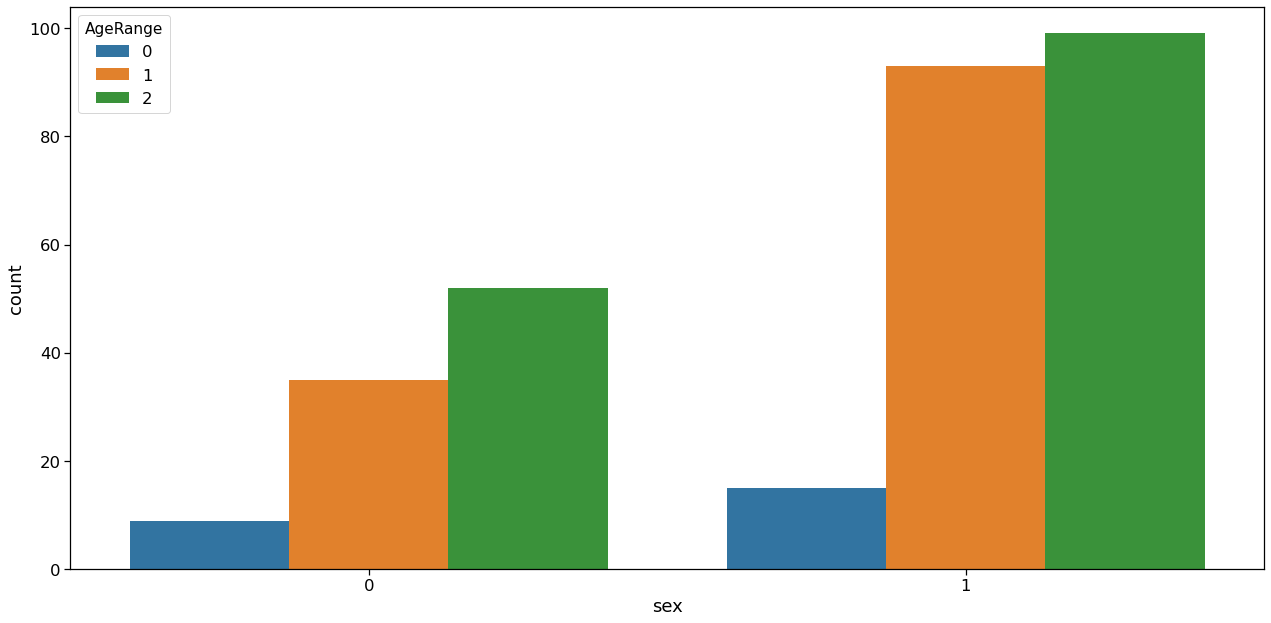

In [20]:
# Let's plot the relation between sex and Age Group.

plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["AgeRange"])
plt.tight_layout()

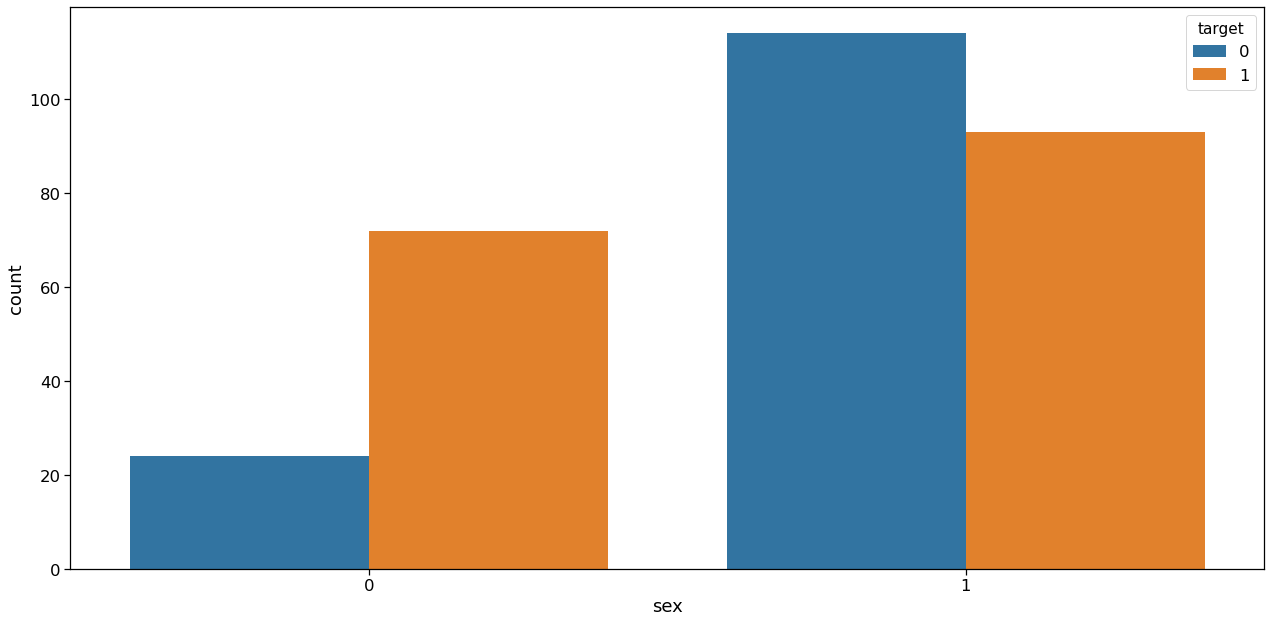

In [21]:
# Let's plot the relation between sex and target.

plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["target"])
plt.tight_layout()

**Males are more likely to have heart disease than Female.**

## Chest Pain Type("cp") Analysis

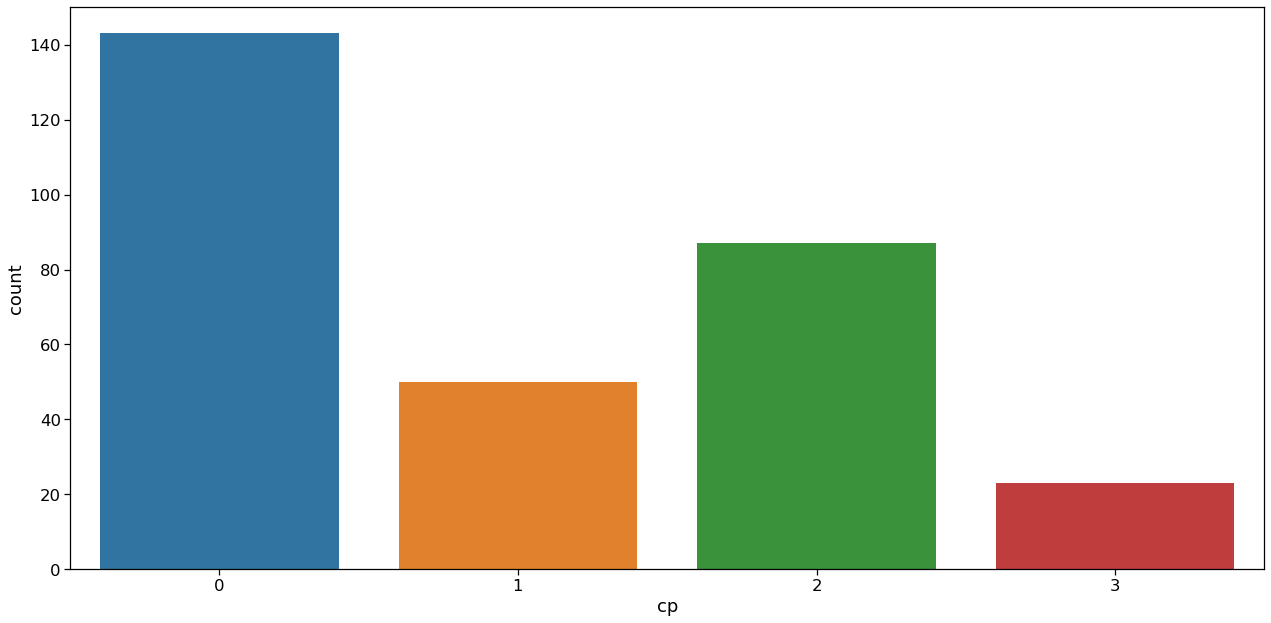

In [22]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'])
plt.tight_layout()

**As seen, there are 4 types of chest pain**

1. status at least
2. condition slightly distressed
3. condition medium problem
4. condition too bad

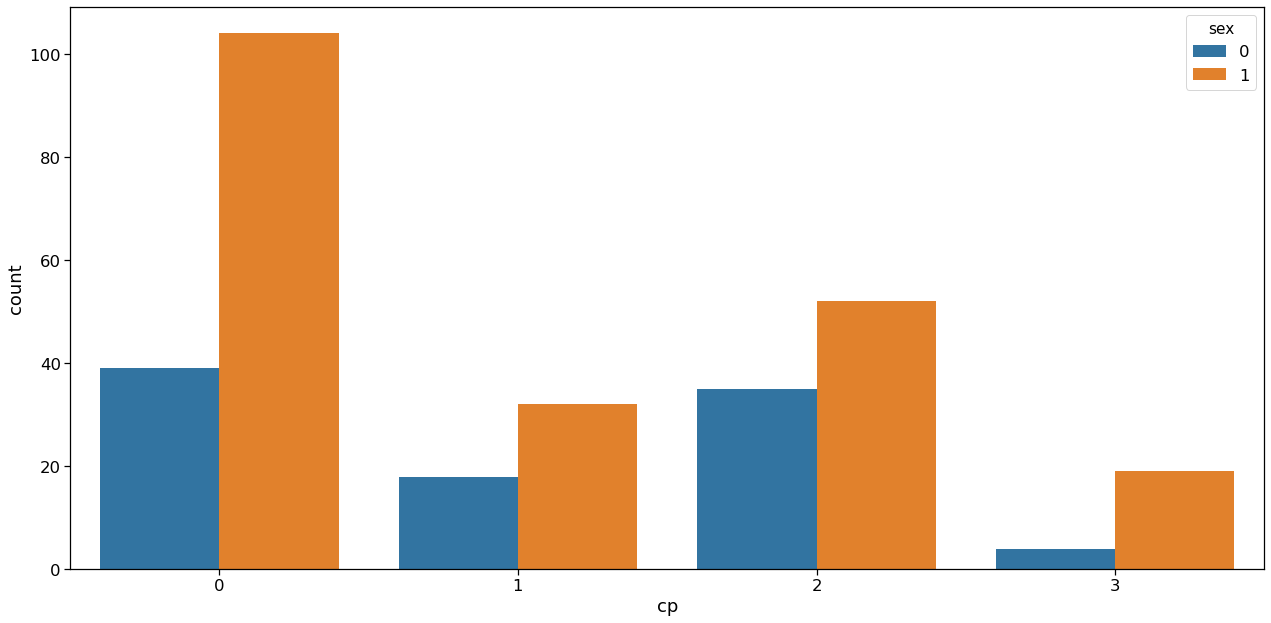

In [23]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'],hue=data["sex"])
plt.tight_layout()

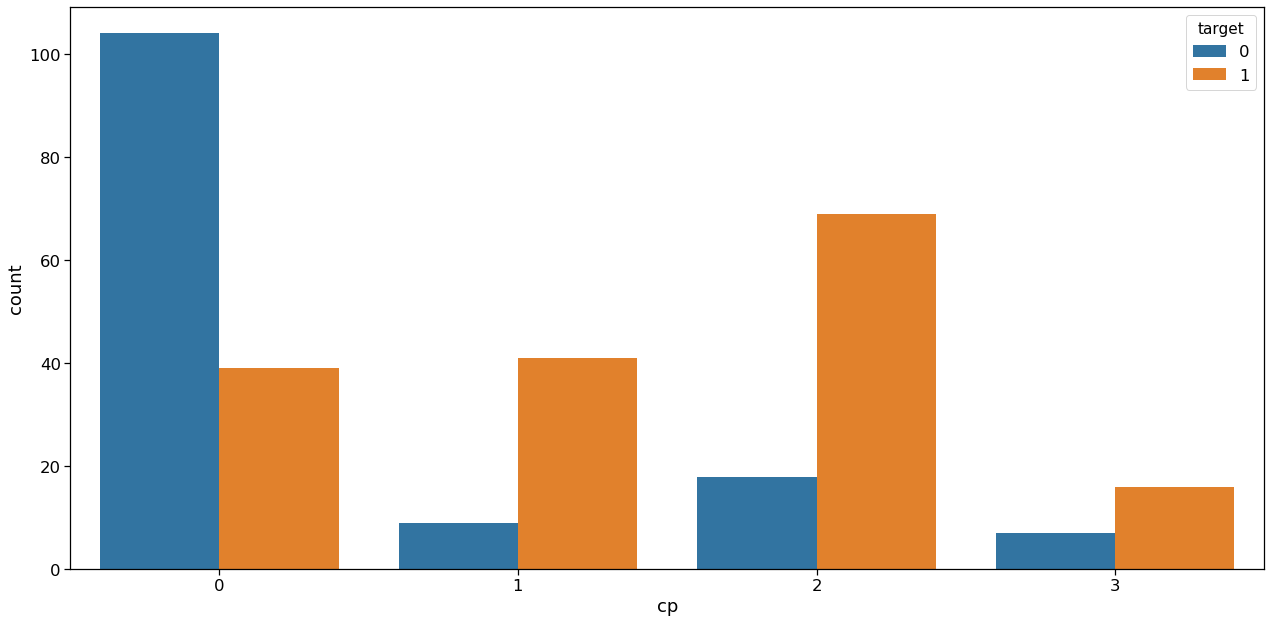

In [24]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'],hue=data["target"])
plt.tight_layout()

* People having least chest pain are not likely to heart disease.
* People having severe chest pain are  likely to heart disease.

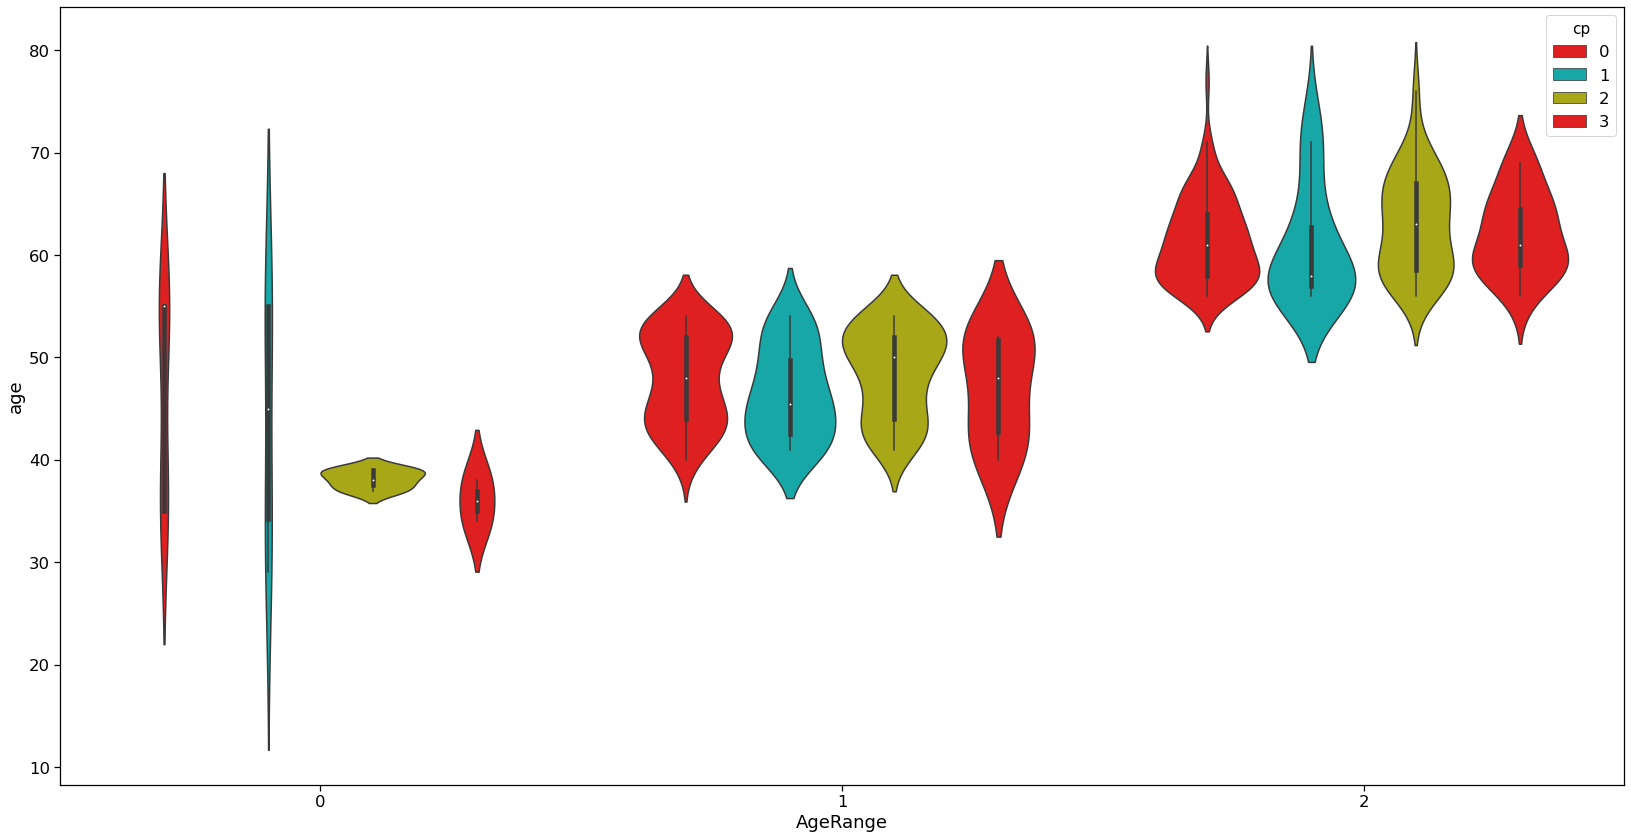

In [25]:
plt.figure(figsize=(23,12))
sns.set_context('notebook',font_scale = 1.5)
sns.violinplot(x="AgeRange",y="age",data=data,palette=["r", "c", "y"],hue="cp")
plt.tight_layout()

**Elderly people are more likely to have chest pain.**

# Thal Analysis

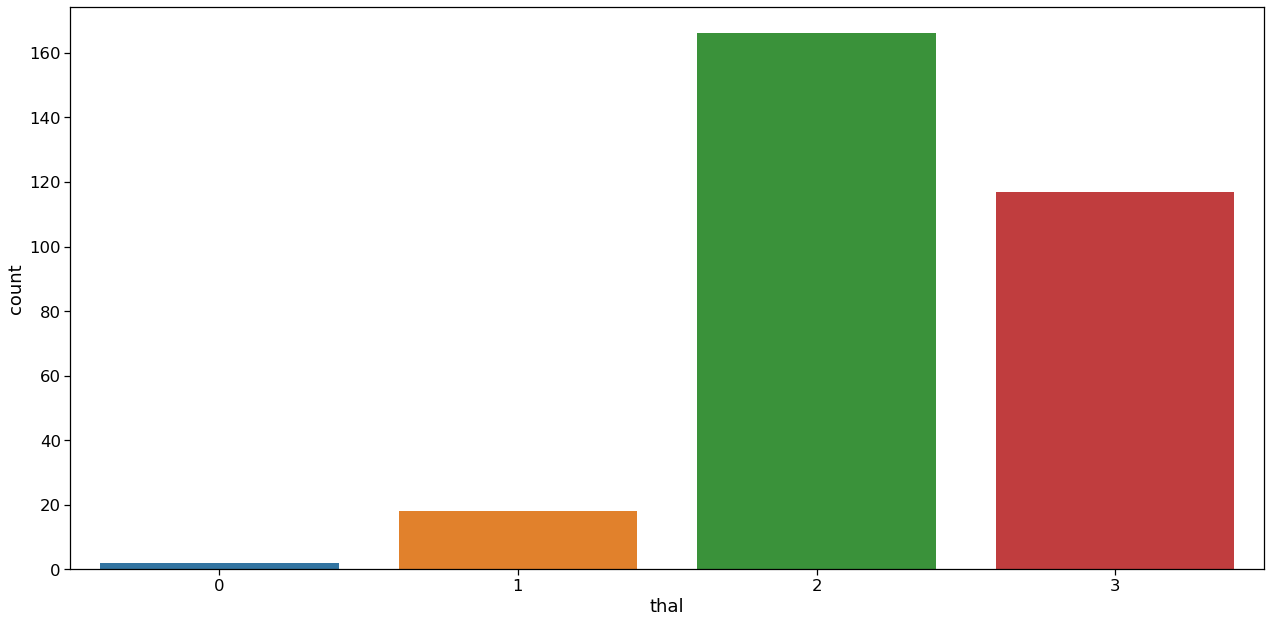

In [26]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'])
plt.tight_layout()

1. 3 = normal
2. 6 = fixed defect
3. 7 = reversable defect

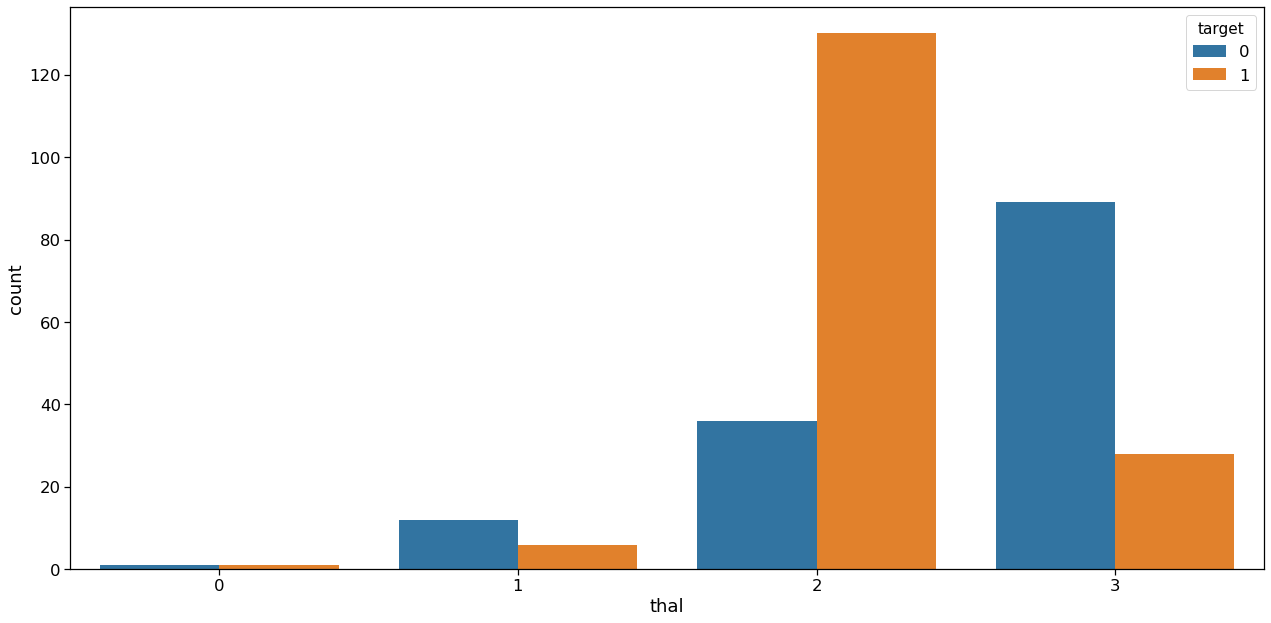

In [27]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'],hue=data["target"])
plt.tight_layout()

**People with fixed defect are more likely to have heart disease.**

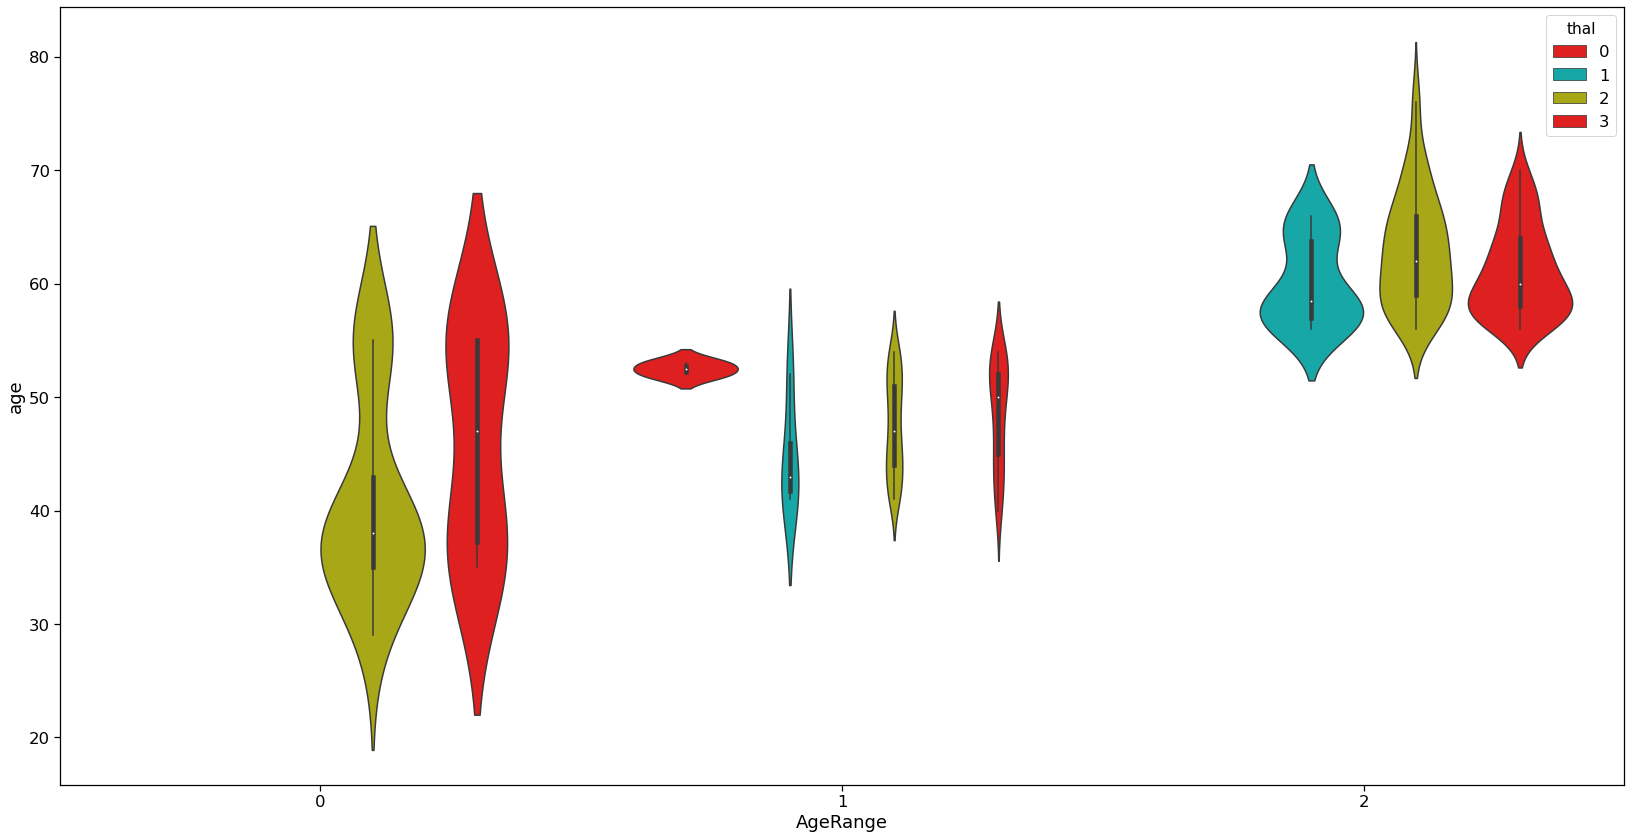

In [28]:
plt.figure(figsize=(23,12))
sns.set_context('notebook',font_scale = 1.5)
sns.violinplot(x="AgeRange",y="age",data=data,palette=["r", "c", "y"],hue="thal")
plt.tight_layout()

## Target 

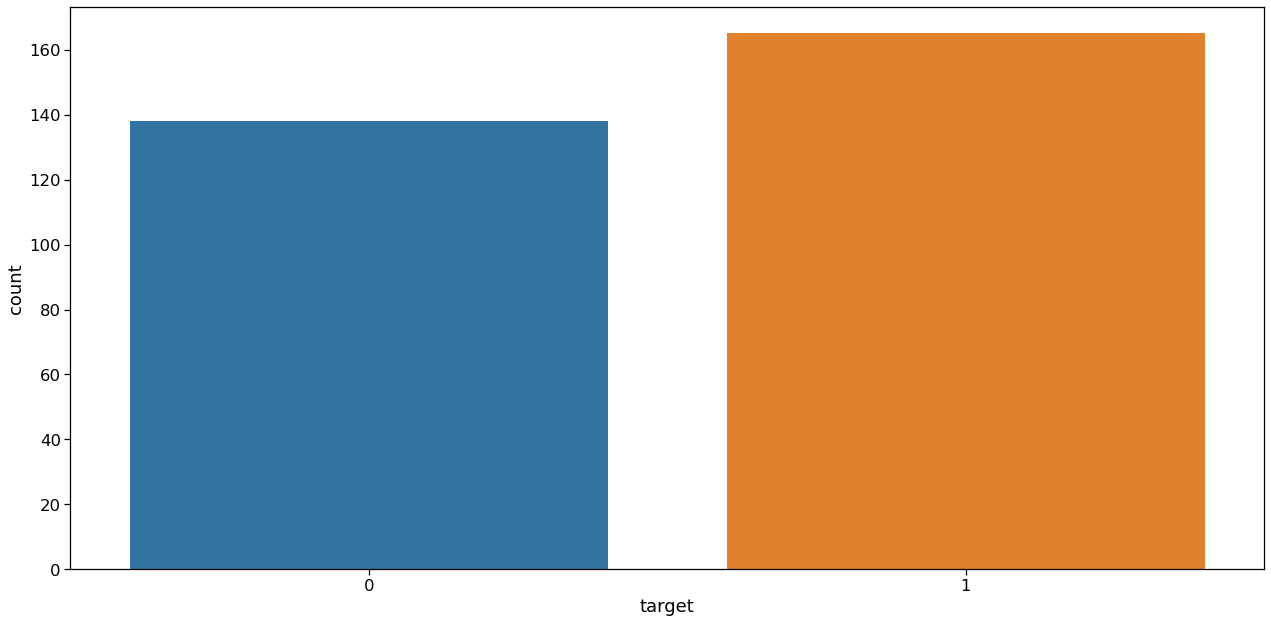

In [29]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['target'])
plt.tight_layout()

**The ratio between 1 and 0 is much less than 1.5 which indicates that target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.**

In [30]:

target_0_agerang_0=len(data[(data.target==0)&(data.AgeRange==0)])
target_1_agerang_0=len(data[(data.target==1)&(data.AgeRange==0)])

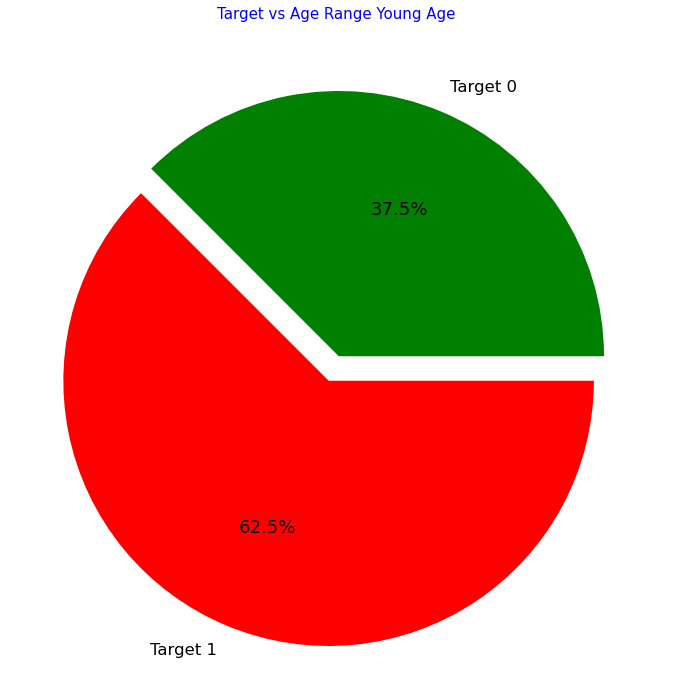

In [31]:
colors = ['green','red']
explode = [0,0.1]
plt.figure(figsize = (10,10))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0','Target 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.tight_layout()

In [32]:
target_0_agerang_1=len(data[(data.target==0)&(data.AgeRange==1)])
target_1_agerang_1=len(data[(data.target==1)&(data.AgeRange==1)])

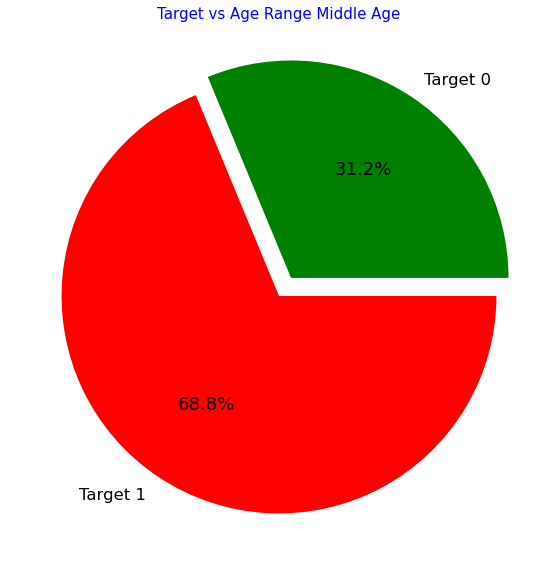

In [33]:
colors = ['green','red']
explode = [0.1,0]
plt.figure(figsize = (10,10))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0','Target 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()

In [34]:
target_0_agerang_2=len(data[(data.target==0)&(data.AgeRange==2)])
target_1_agerang_2=len(data[(data.target==1)&(data.AgeRange==2)])

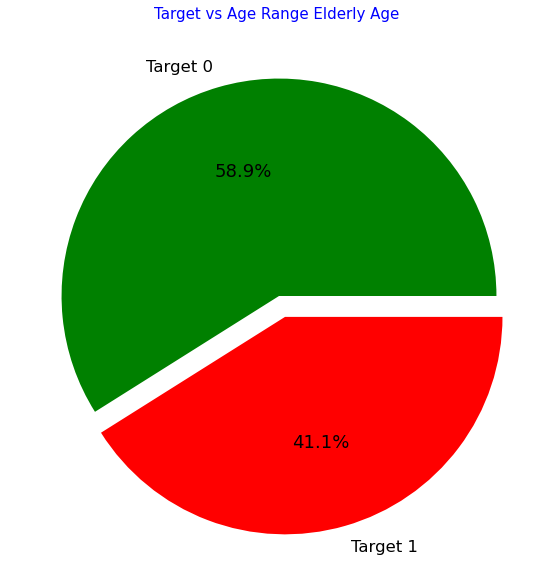

In [35]:
colors = ['green','red']
explode = [0,0.1]
plt.figure(figsize = (10,10))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0','Target 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age ',color = 'blue',fontsize = 15)
plt.show()

# Feature Enginnering

In [36]:
categorical_val = []
continous_val = []
for column in df.columns:
    print("#######")
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

#######
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
#######
sex : [1 0]
#######
cp : [3 2 1 0]
#######
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
#######
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218

In [37]:
categorical_val.remove('target')
dfs = pd.get_dummies(df, columns = categorical_val)

In [38]:
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


In [39]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])

In [40]:
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


# Modelling

**Splitting our dataset**

In [41]:
X = dfs.drop('target', axis=1)
y = dfs.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will work on following algo - 

* KNN
* Random Forest Classifier
* XGBoost
* CatBoost

## KNN

In [42]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [44]:
y_pred1 = knn.predict(X_test)

In [45]:
print(accuracy_score(y_test,y_pred1))

0.8571428571428571


In [46]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

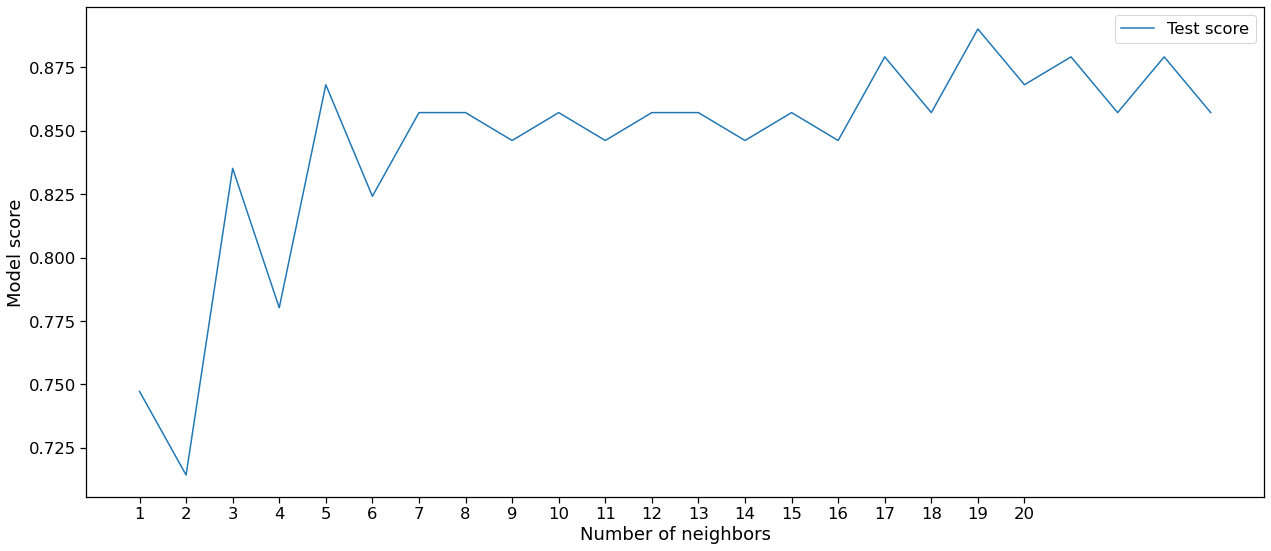

In [47]:
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

**At K=19, we are getting highest test accuracy.**

In [48]:
knn = KNeighborsClassifier(n_neighbors = 19)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [50]:
y_pred1 = knn.predict(X_test)

In [51]:
print(accuracy_score(y_test,y_pred1))

0.8901098901098901


**We achieved accuracy 89% with KNN Model after Hyperparameter Optimization.**

## Random Forest Classifier

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)

In [53]:
print(accuracy_score(y_test,y_pred2))

0.8681318681318682


In [55]:
## Hyperparameter Optimization

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

params2 ={
    
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)], 
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth, 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]
}

In [56]:
rfc = RandomForestClassifier(random_state=42)

rfcs = RandomizedSearchCV(estimator=rfc, param_distributions=params2, n_iter=100, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)

In [57]:
rfcs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  7.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [61]:
rfcs.best_estimator_

RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400, random_state=42)

In [62]:
model2 = RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400, random_state=42)

In [63]:
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

In [64]:
print(accuracy_score(y_test,y_pred2))

0.8351648351648352


**We achieved accuracy 86% approx with Random Forest Classifier Model. There is no improvement after Hyperparameter Optimization.**

## XGBoost

In [66]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)
y_pred3 = xgb.predict(X_test)

In [67]:
print(accuracy_score(y_test,y_pred3))

0.8241758241758241


**We achieved accuracy 82% approx with XGBoost Classifier Model.**

## CatBoost

In [68]:
model4 = CatBoostClassifier(random_state=42)

In [69]:
model4.fit(X_train,y_train)
y_pred4 = model4.predict(X_test)

Learning rate set to 0.005312
0:	learn: 0.6894030	total: 56.8ms	remaining: 56.8s
1:	learn: 0.6863904	total: 58.7ms	remaining: 29.3s
2:	learn: 0.6839674	total: 59.7ms	remaining: 19.9s
3:	learn: 0.6790283	total: 61.3ms	remaining: 15.3s
4:	learn: 0.6747273	total: 62.9ms	remaining: 12.5s
5:	learn: 0.6718532	total: 64.4ms	remaining: 10.7s
6:	learn: 0.6683996	total: 65.9ms	remaining: 9.34s
7:	learn: 0.6636973	total: 67.4ms	remaining: 8.35s
8:	learn: 0.6596138	total: 68.9ms	remaining: 7.59s
9:	learn: 0.6555285	total: 70.4ms	remaining: 6.97s
10:	learn: 0.6514217	total: 71.9ms	remaining: 6.46s
11:	learn: 0.6475565	total: 73.4ms	remaining: 6.04s
12:	learn: 0.6456431	total: 74ms	remaining: 5.62s
13:	learn: 0.6409267	total: 75.5ms	remaining: 5.32s
14:	learn: 0.6374355	total: 77ms	remaining: 5.05s
15:	learn: 0.6340955	total: 78.4ms	remaining: 4.82s
16:	learn: 0.6302547	total: 79.9ms	remaining: 4.62s
17:	learn: 0.6261939	total: 81.4ms	remaining: 4.44s
18:	learn: 0.6221788	total: 82.9ms	remaining: 4.

207:	learn: 0.3019405	total: 368ms	remaining: 1.4s
208:	learn: 0.3013257	total: 370ms	remaining: 1.4s
209:	learn: 0.3008730	total: 371ms	remaining: 1.4s
210:	learn: 0.3001000	total: 373ms	remaining: 1.39s
211:	learn: 0.2991408	total: 374ms	remaining: 1.39s
212:	learn: 0.2984458	total: 376ms	remaining: 1.39s
213:	learn: 0.2972894	total: 377ms	remaining: 1.39s
214:	learn: 0.2968004	total: 379ms	remaining: 1.38s
215:	learn: 0.2961508	total: 380ms	remaining: 1.38s
216:	learn: 0.2955553	total: 382ms	remaining: 1.38s
217:	learn: 0.2949080	total: 383ms	remaining: 1.37s
218:	learn: 0.2941045	total: 385ms	remaining: 1.37s
219:	learn: 0.2936047	total: 386ms	remaining: 1.37s
220:	learn: 0.2930849	total: 388ms	remaining: 1.37s
221:	learn: 0.2922880	total: 389ms	remaining: 1.36s
222:	learn: 0.2915713	total: 391ms	remaining: 1.36s
223:	learn: 0.2908934	total: 392ms	remaining: 1.36s
224:	learn: 0.2904194	total: 394ms	remaining: 1.35s
225:	learn: 0.2897776	total: 395ms	remaining: 1.35s
226:	learn: 0.2

459:	learn: 0.1883051	total: 742ms	remaining: 871ms
460:	learn: 0.1879734	total: 744ms	remaining: 870ms
461:	learn: 0.1878421	total: 744ms	remaining: 867ms
462:	learn: 0.1875668	total: 746ms	remaining: 865ms
463:	learn: 0.1873796	total: 747ms	remaining: 863ms
464:	learn: 0.1871226	total: 749ms	remaining: 862ms
465:	learn: 0.1868716	total: 750ms	remaining: 860ms
466:	learn: 0.1866597	total: 752ms	remaining: 858ms
467:	learn: 0.1865446	total: 753ms	remaining: 856ms
468:	learn: 0.1861219	total: 755ms	remaining: 855ms
469:	learn: 0.1858784	total: 756ms	remaining: 853ms
470:	learn: 0.1856566	total: 758ms	remaining: 851ms
471:	learn: 0.1854068	total: 759ms	remaining: 849ms
472:	learn: 0.1850536	total: 761ms	remaining: 847ms
473:	learn: 0.1847690	total: 762ms	remaining: 846ms
474:	learn: 0.1845143	total: 763ms	remaining: 844ms
475:	learn: 0.1843009	total: 765ms	remaining: 842ms
476:	learn: 0.1841100	total: 766ms	remaining: 840ms
477:	learn: 0.1837918	total: 768ms	remaining: 839ms
478:	learn: 

719:	learn: 0.1310343	total: 1.12s	remaining: 434ms
720:	learn: 0.1308740	total: 1.12s	remaining: 433ms
721:	learn: 0.1306356	total: 1.12s	remaining: 431ms
722:	learn: 0.1305218	total: 1.12s	remaining: 430ms
723:	learn: 0.1303087	total: 1.12s	remaining: 428ms
724:	learn: 0.1301892	total: 1.12s	remaining: 426ms
725:	learn: 0.1300551	total: 1.13s	remaining: 425ms
726:	learn: 0.1299121	total: 1.13s	remaining: 423ms
727:	learn: 0.1296321	total: 1.13s	remaining: 422ms
728:	learn: 0.1293779	total: 1.13s	remaining: 420ms
729:	learn: 0.1291467	total: 1.13s	remaining: 419ms
730:	learn: 0.1289925	total: 1.13s	remaining: 417ms
731:	learn: 0.1289049	total: 1.13s	remaining: 415ms
732:	learn: 0.1287822	total: 1.14s	remaining: 414ms
733:	learn: 0.1286004	total: 1.14s	remaining: 412ms
734:	learn: 0.1285472	total: 1.14s	remaining: 411ms
735:	learn: 0.1283931	total: 1.14s	remaining: 409ms
736:	learn: 0.1282679	total: 1.14s	remaining: 408ms
737:	learn: 0.1280595	total: 1.14s	remaining: 406ms
738:	learn: 

964:	learn: 0.0952914	total: 1.49s	remaining: 54.2ms
965:	learn: 0.0952018	total: 1.5s	remaining: 52.6ms
966:	learn: 0.0950902	total: 1.5s	remaining: 51.1ms
967:	learn: 0.0950355	total: 1.5s	remaining: 49.5ms
968:	learn: 0.0949618	total: 1.5s	remaining: 48ms
969:	learn: 0.0948142	total: 1.5s	remaining: 46.4ms
970:	learn: 0.0946833	total: 1.5s	remaining: 44.9ms
971:	learn: 0.0946037	total: 1.5s	remaining: 43.3ms
972:	learn: 0.0945593	total: 1.5s	remaining: 41.8ms
973:	learn: 0.0944527	total: 1.51s	remaining: 40.2ms
974:	learn: 0.0943614	total: 1.51s	remaining: 38.7ms
975:	learn: 0.0942433	total: 1.51s	remaining: 37.1ms
976:	learn: 0.0940624	total: 1.51s	remaining: 35.6ms
977:	learn: 0.0939088	total: 1.51s	remaining: 34ms
978:	learn: 0.0938019	total: 1.51s	remaining: 32.5ms
979:	learn: 0.0936777	total: 1.51s	remaining: 30.9ms
980:	learn: 0.0935255	total: 1.52s	remaining: 29.4ms
981:	learn: 0.0934368	total: 1.52s	remaining: 27.8ms
982:	learn: 0.0933277	total: 1.52s	remaining: 26.3ms
983:	

In [70]:
print(accuracy_score(y_test,y_pred4))

0.8131868131868132


**We achieved accuracy 81% approx with CatBoost Classifier Model.**

**So far the best accuracy is achieved through KNN Model which is 89%.**

# Thank You!!